In [1]:
#Importing Dependencies
import sys
import matplotlib
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data
games = pandas.read_csv("games.csv")
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


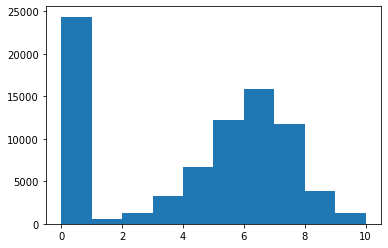

In [3]:
#Making a histogram of the ratings of the game
plt.hist(games["average_rating"])
plt.show()

In [4]:
print(games[games["average_rating"]==0].iloc[0])
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

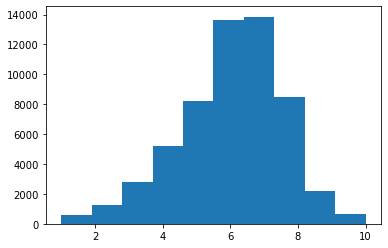

In [5]:
#Cleaning the data
games=games[games["users_rated"]>0]
games.dropna(axis=0)
plt.hist(games["average_rating"])
plt.show()

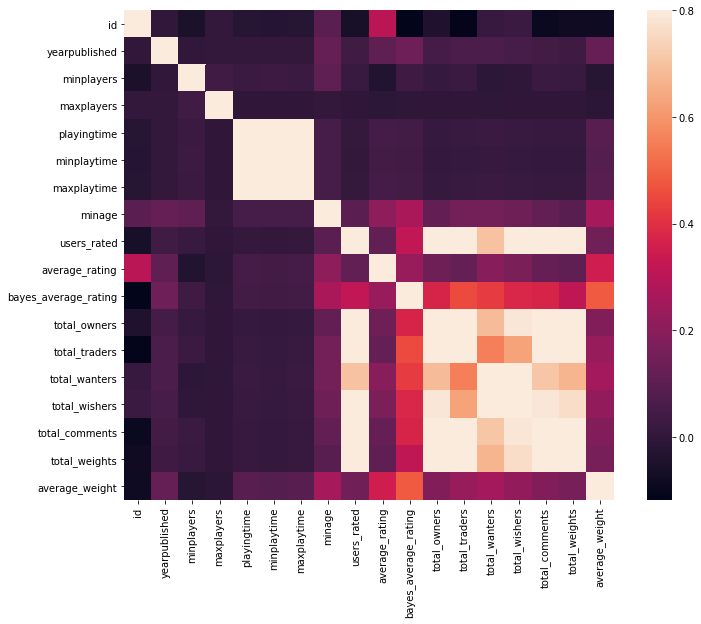

In [6]:
#Correlation matrix
corrmat = games.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [12]:
columns = games.columns.tolist()
columns= [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id","year_published"]]
x=games[columns]
target="average_rating"
y=games[target]

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
#train = games.sample(frac=0.8,random_state=1)
#test = games.loc[~games.index.isin(train.index)]
#print(train.shape)
#print(test.shape)


In [18]:
#Import linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Initialize the model class

lr = LinearRegression()
lr.fit(xtrain,ytrain)
#lr.fit(train[x],train[y])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').